In [52]:
'''
from skimage.io import imread
from skimage.transform import resize
import numpy as np

import math

# Here, `x_set` is list of path to the images
# and `y_set` are the associated classes.

class CIFAR10Sequence(Sequence):

    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return math.ceil(len(self.x) / self.batch_size)

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) *
        self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) *
        self.batch_size]

        return np.array([
            resize(imread(file_name), (200, 200))
               for file_name in batch_x]), np.array(batch_y)
'''
pass

In [58]:
import math
import random
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from tensorflow import keras

In [63]:
class DataGenerator(keras.utils.Sequence):
    def __init__(self, batch_size, csv_path, fold, image_size, mode='train', shuffle= True):
        self.batch_size = batch_size
        self.image_size = image_size
        self.fold = fold
        self.mode = mode
        self.shuffle = shuffle
        
        self.df = pd.read_csv(csv_path)
        
        if self.mode == 'train':
            self.df = self.df[self.df['fold'] != self.fold]    
        elif self.mode =='val':
            self.df = self.df[self.df['fold'] == self.fold]      
        
        self.on_epoch_end() 
        
    def on_epoch_end(self):
        if self.shuffle:
            self.df = self.df.sample(frac=1).reset_index(drop=True)   
        
    def __len__(self):
        return math.ceil(len(self.df)/self.batch_size)  
    
    def __getitem__(self, idx): 
        start = idx * self.batch_size
        finish = (idx+1) * self.batch_size
        data = self.df.iloc[start:finish]
        
        batch_x, batch_y = self.get_data(data)
        return np.array(batch_x), np.array(batch_y)
        
    def get_data(self, data): 
        batch_x=[]
        batch_y=[]
        
        for _, r in data.iterrows():
            file_name = r['File_name_pic']
            image = cv2.imread(f'../../labelling/{file_name}.jpg')
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
            image = cv2.resize(image, (self.image_size, self.image_size)) 
            image = image/ 255.
            
            label = int(r['grade'])
            
            batch_x.append(image)
            batch_y.append(label)
        
        return batch_x, batch_y

In [64]:
csv_path = './data/grade/KLgrade_kfold.csv'

# __init__(self, batch_size, csv_path, fold, image_size, mode='train', shuffle= True):
train_generator = DataGenerator(
    batch_size = 9,
    csv_path = csv_path,
    fold = 1,
    image_size = 256,
    mode = 'train',
    shuffle = True
)

In [65]:
print(len(train_generator))

5


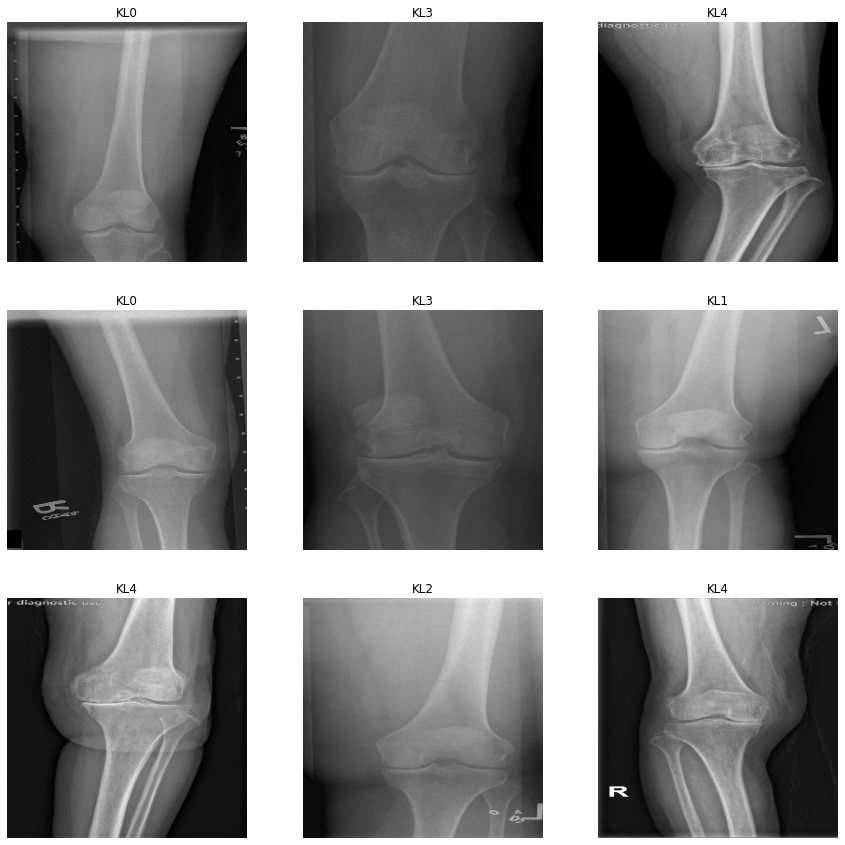

In [70]:
class_name = ['KL0','KL1', 'KL2', 'KL3', 'KL4']

for batch in train_generator:
    X, y = batch
    plt.figure(figsize=(15, 15))
    
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(X[i])
        plt.title(class_name[y[i]])
        plt.axis('off')
    break

In [19]:
!python --version

Python 3.6.8
